In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("online_sales_dataset.csv", parse_dates=["InvoiceDate"])

# Check data
print(df.shape)
df.head()


(49782, 17)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [2]:
# Remove negative or zero quantities (returns/refunds)
df = df[df["Quantity"] > 0]

# Keep only needed columns
df = df[["InvoiceDate", "Description", "Quantity", "Country"]]

# Create Month column
df["Month"] = df["InvoiceDate"].dt.to_period("M").dt.to_timestamp()


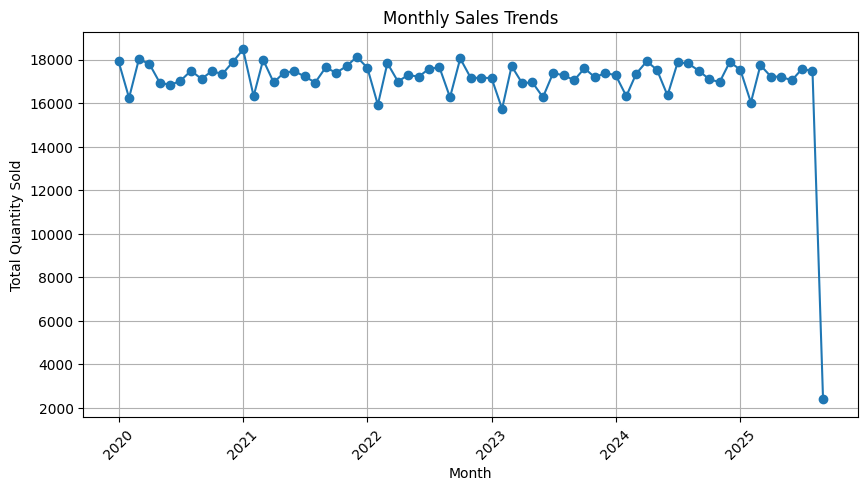

In [3]:
monthly_sales = df.groupby("Month")["Quantity"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Month"], monthly_sales["Quantity"], marker="o")
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [4]:
best_month = monthly_sales.loc[monthly_sales["Quantity"].idxmax()]
worst_month = monthly_sales.loc[monthly_sales["Quantity"].idxmin()]

print("📈 Best Month:", best_month["Month"].strftime("%Y-%m"), "→", best_month["Quantity"])
print("📉 Worst Month:", worst_month["Month"].strftime("%Y-%m"), "→", worst_month["Quantity"])


📈 Best Month: 2021-01 → 18467
📉 Worst Month: 2025-09 → 2381


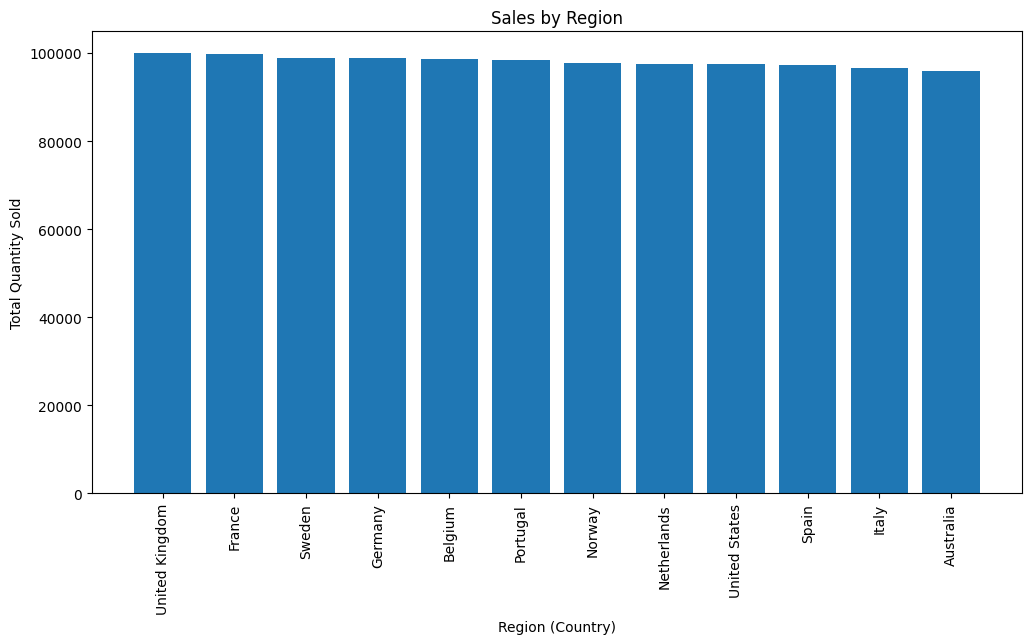

In [5]:
region_sales = df.groupby("Country")["Quantity"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
plt.bar(region_sales["Country"], region_sales["Quantity"])
plt.title("Sales by Region")
plt.xlabel("Region (Country)")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.show()
